<a href="https://colab.research.google.com/github/alphaczar/Deep-Learning/blob/master/Object_Detection_keras_RetinaNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import math
import glob
import argparse
import xml.etree.ElementTree as ET

import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


***Loading Data***


In [ ]:
train_data = '/content/drive/My Drive/Object Detection/Data/train/'
test_data = '/content/drive/My Drive/Object Detection/Data/test/'


***Classes***

In [ ]:
classes = ['cat','dog','person']

In [ ]:
import glob

train_txt = glob.glob(train_data + '/*.txt')
train_jpg = glob.glob(train_data + '/*.jpg')
train_xml = glob.glob(train_data + '/*.xml')

test_txt = glob.glob(test_data + '/*.txt')
test_jpg = glob.glob(test_data + '/*.jpg')
test_xml = glob.glob(test_data + '/*.xml')

In [ ]:
train_xml[1]

'/content/drive/My Drive/Object Detection/Data/train/52.xml'

In [ ]:
# CONVERT the XML annotations to CSV format
def convert_annotation(train_data, test_data, image_id, filename, classes, train=False):
    if train:
        in_file = open(train_data + '%s.xml' % image_id)
    else:
        in_file = open(test_data + '%s.xml' % image_id)

    out_file = open(filename, 'a')
    tree = ET.parse(in_file)
    root = tree.getroot()

    if root.iter('object') is not None:
        for obj in root.iter('object'):
            cls = obj.find('name').text
            if cls not in classes:
                continue
            cls_id = classes.index(cls)

            xmlbox = obj.find('bndbox')
            x1 = math.ceil(float(xmlbox.find('xmin').text))
            y1 = math.ceil(float(xmlbox.find('ymin').text))
            x2 = math.ceil(float(xmlbox.find('xmax').text))
            y2 = math.ceil(float(xmlbox.find('ymax').text))
            if x1 == x2 or y1 == y2:
                continue
            if train:
                out_file.write(
                    f'{train_data + image_id}.jpg,{x1},{y1},{x2},{y2},{cls}\n')
            else:
                out_file.write(
                    f'{test_data + image_id}.jpg,{x1},{y1},{x2},{y2},{cls}\n')
    else:
        if train:
            out_file.write(f'{train_data + image_id}.jpg,,,,,\n')
        else:
            out_file.write(f'{test_data + image_id}.jpg,,,,,\n')


In [ ]:
# train file location

train_annotations = '/content/drive/My Drive/Object Detection/Data/train/annotations.csv'
val_annotations = '/content/drive/My Drive/Object Detection/Data/train/val_annotations.csv'
label_file = '/content/drive/My Drive/Object Detection/Data/train/classes.csv'

In [ ]:
# #retina_path = /content/keras-retinanet/

# train_annotations = '/content/keras-retinanet/annotations.csv'
# val_annotations = '/content/keras-retinanet/val_annotations.csv'
# label_file = '/content/keras-retinanet/classes.csv'

In [ ]:
# filter out the train test jpg files
train_image = glob.glob(train_data + '/*.jpg')
test_image = glob.glob(test_data + '/*.jpg')

# define the classes for the model

labels = ['cat', 'dog', 'person']

In [ ]:
open(train_annotations, 'w')
open(val_annotations, 'w')

train_ids = [os.path.basename(i[:-4]) for i in train_image]
for image_id in train_ids:
    convert_annotation(train_data, test_data, image_id, train_annotations, labels, train=True)

val_ids = [os.path.basename(i[:-4]) for i in test_image]
for image_id in val_ids:
    convert_annotation(train_data, test_data, image_id, val_annotations, labels)

# creating classes file listing all classes
with open(label_file, 'w') as f:
    for i, line in enumerate(labels):
        f.write('{},{}\n'.format(line, i))

In [ ]:
dftrain = pd.read_csv('/content/drive/My Drive/Object Detection/Data/train/annotations.csv',header=None)
dftrain.columns = ['image_name','x_min','ymin','x_max','y_max','Class']

dftest = pd.read_csv('/content/drive/My Drive/Object Detection/Data/train/val_annotations.csv',header=None)
dftest.columns = ['image_name','x_min','ymin','x_max','y_max','Class']

In [ ]:
dftrain.head()

,image_name,x_min,ymin,x_max,y_max,Class
0,/content/drive/My Drive/Object Detection/Data/...,427,18,600,389,person
1,/content/drive/My Drive/Object Detection/Data/...,173,73,430,391,dog
2,/content/drive/My Drive/Object Detection/Data/...,161,101,346,309,dog
3,/content/drive/My Drive/Object Detection/Data/...,321,10,508,262,person
4,/content/drive/My Drive/Object Detection/Data/...,401,6,720,409,dog


***Keras Git Clone***


In [ ]:
!git clone https://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [ ]:
%cd keras-retinanet/
 
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170847 sha256=1ac83059d9914d152a892896d86fa7abd00d9070e8a0f615ea699b8b31d63ad4
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=3e22b9d5a3fe6b7227ecfd52e52ba9abb79b86db068b808d7d81fd6dd3f01a40
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [ ]:
#from urllib.request import urlopen
PRETRAINED_MODEL = '/content/drive/My Drive/DeepLearning/Data/ObjectDetection/Data/Weights/'
print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to /content/drive/My Drive/DeepLearning/Data/ObjectDetection/Data/Weights/


***Model Training ***

> Training with 15 epochs, batch_size 8, 600 steps and default augmentations


In [ ]:
!python /content/keras-retinanet/keras_retinanet/bin/train.py --backbone='resnet101' --weights /content/keras-retinanet/snapshots/resnet50_coco_best_v2.0.1.h5 --random-transform --gpu=0 --batch-size=8 --steps 600 --epochs 15 --image-min-side=500 --image-max-side=500 --lr 0.001 --weighted-average --compute-val-loss csv /content/keras-retinanet/annotations.csv /content/keras-retinanet/classes.csv \
--val-annotations /content/keras-retinanet/val_annotations.csv


Using TensorFlow backend.
2020-07-31 09:58:36.382520: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-31 09:58:38.287866: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-31 09:58:38.306078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-31 09:58:38.306795: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-07-31 09:58:38.306837: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-31 09:58:38.308704: I tensorflow/str

*Tried to run with 25 epochs and 600 steps and 8 batch size but Colab brokedown and had GPU allocation issues so had the save model with best map 0.37 so far*

***Evaluation***

In [ ]:
!retinanet-evaluate --backbone='resnet50' --max-detections=200 --iou-threshold 0.05 --image-min-side 500 --image-max-side 500 csv val_annotations.csv classes.csv \/content/keras-retinanet/snapshots/resnet50_csv_07.h5 --convert-model

Using TensorFlow backend.
2020-07-30 08:19:44.039337: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading model, this may take a second...
2020-07-30 08:19:46.089952: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-30 08:19:46.115311: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-30 08:19:46.116135: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-07-30 08:19:46.116181: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
202

***Inference Model***

In [ ]:
!retinanet-convert-model /content/keras-retinanet/snapshots/resnet50_csv_07.h5   /content/keras-retinanet/final_Model.h5  
#--backbone='resnet50' --nms-threshold=0.2 

Using TensorFlow backend.
2020-07-31 09:08:37.129159: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-31 09:08:39.224685: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-31 09:08:39.228745: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-07-31 09:08:39.228813: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (14a8a61c6fd7): /proc/driver/nvidia/version does not exist
2020-07-31 09:08:39.332087: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2300000000 Hz
2020-07-31 09:08:39.332357: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x319ed80 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-07-31 09:08:3

***Prediction***
> Loading modules



In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import keras
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***Loading RetinaNet Model***

In [ ]:
model_path = '/content/keras-retinanet/final_Model.h5'
model = models.load_model(model_path)
labels_to_names = {0: 'cat', 1: 'dog', 2: 'person'}

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
# from google.colab import files
# uploaded = files.upload()
# img_infer = list(uploaded)[0]
 
# print('Running inference on: ' + img_infer)
# img_inference(img_infer)

processing time:  3.5596094131469727


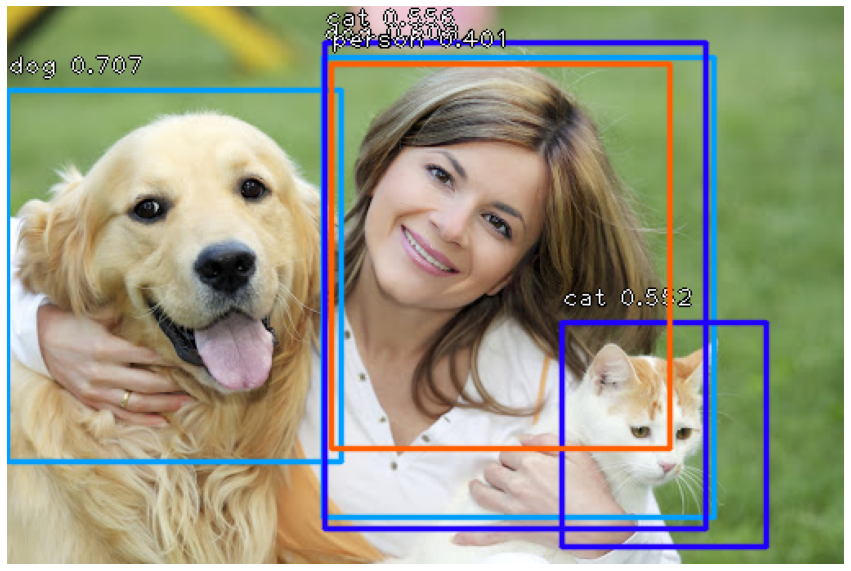

In [ ]:
image = read_image_bgr('/content/drive/My Drive/Object Detection/image3.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image,500,500)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)
# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.4:
        break
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show() 

